In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the spam dataset
data = pd.read_csv("https://raw.githubusercontent.com/ustunb/classification-pipeline/master/Data/Raw%20Data%20Files/spambase.csv")

# print dataset info
print(data.info())

# Print sample emails
print(data.head())

Spam                        0
WordFreqMake                0
WordFreqAddress             0
WordFreqAll                 0
WordFreq3D                  0
WordFreqOur                 0
WordFreqOver                0
WordFreqRemove              0
WordFreqInternet            0
WordFreqOrder               0
WordFreqMail                0
WordFreqReceive             0
WordFreqWill                0
WordFreqPeople              0
WordFreqReport              0
WordFreqAddresses           0
WordFreqFree                0
WordFreqBusiness            0
WordFreqEmail               0
WordFreqYou                 0
WordFreqCredit              0
WordFreqYour                0
WordFreqFont                0
WordFreq0                   0
WordFreqMoney               0
WordFreqHP                  0
WordFreqHPL                 0
WordFreqGeorge              0
WordFreq650                 0
WordFreqLab                 0
WordFreqLabs                0
WordFreqTelnet              0
WordFreq857                 0
WordFreqDa

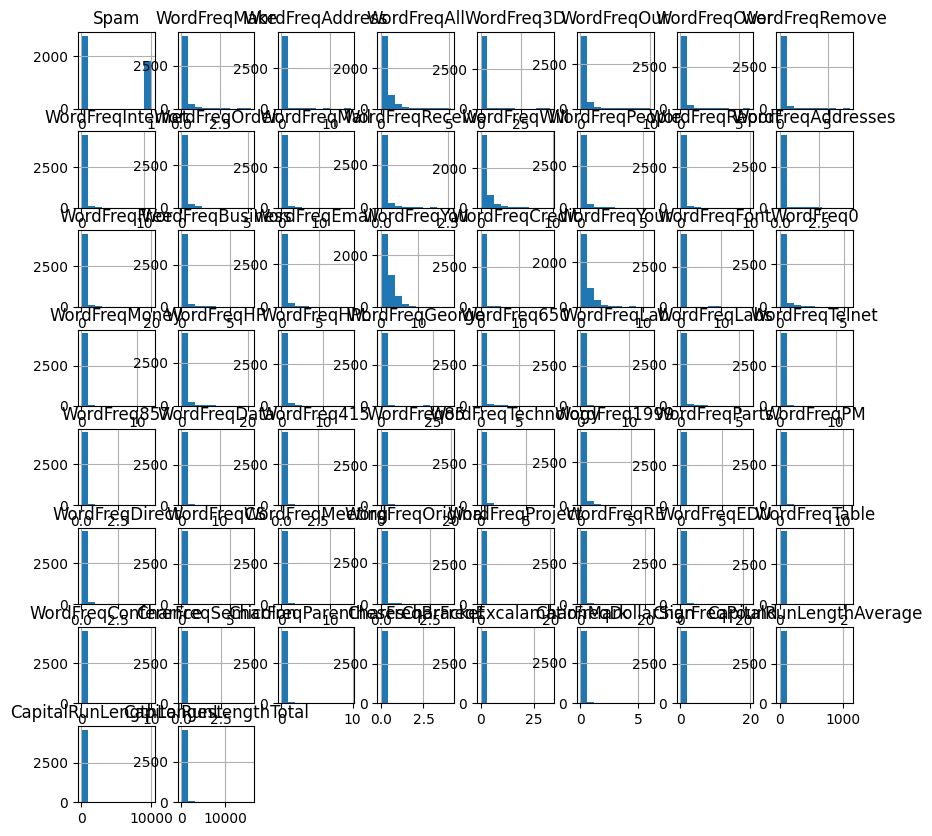

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Describe the data
print(data.describe())

# Visualize data distribution
data.hist(figsize=(10, 10))
plt.show()

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy="median")
data_numeric = data.select_dtypes(include=["number"])
data_numeric = imputer.fit_transform(data_numeric)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_numeric, data["Spam"], test_size=0.2)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the model
model = keras.Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
115/115 [==============================] - 5s 12ms/step - loss: 0.3404 - accuracy: 0.8851 - val_loss: 0.0948 - val_accuracy: 0.9848
Epoch 2/20
115/115 [==============================] - 1s 9ms/step - loss: 0.0885 - accuracy: 0.9804 - val_loss: 0.0218 - val_accuracy: 0.9946
Epoch 3/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0317 - accuracy: 0.9918 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 4/20
115/115 [==============================] - 1s 5ms/step - loss: 0.0224 - accuracy: 0.9962 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/20
115/115 [==============================] - 1s 6ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 8.4215e-04 - val_accuracy: 1.0000
E

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

29/29 [==============================] - 0s 5ms/step - loss: 4.3793e-05 - accuracy: 1.0000
Loss: 4.379260280984454e-05
Accuracy: 1.0


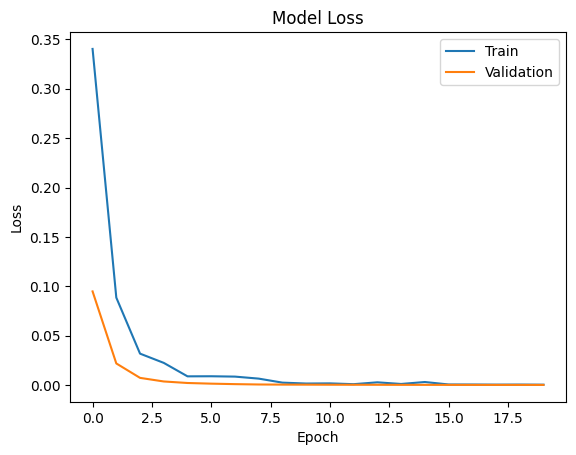

In [ ]:
# Plot epochs vs loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Save the model
model.save("spam_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
